# Section 5: Polynomial Regression
Polynomial Regression is a special case of Linear Regression where we fit the polynomial equation on the data with a curvilinear relationship between the dependent and independent variables. It is a form of regression analysis in which the relationship between the independent variables and dependent variables are modeled in the nth degree polynomial. 
Polynomial Regression models are usually fit with the method of least squares.The least square method minimizes the variance of the coefficients,under the Gauss Markov Theorem.

![PolynomialRegression](../media/PolynomialRegression.png)

Polynomial Regression does not require the relationship between the independent and dependent variables to be linear in the data set,This is also one of the main difference between the Linear and Polynomial Regression. It is generally used when the points in the data are not captured by the Linear Regression Model and the Linear Regression fails in describing the best result clearly.

# Importing the libraries 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

# Load Data

In [2]:
dataset=pd.read_csv('../data/Position_Salaries.csv') 
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


<Axes: xlabel='Level', ylabel='Salary'>

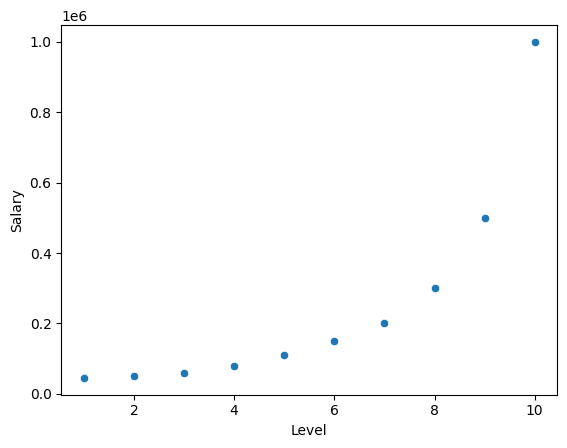

In [4]:
sns.scatterplot(x='Level', y='Salary',data = dataset)

In [5]:
x = dataset.iloc[:, 1:-1].values  
y = dataset.iloc[:, -1].values  

In [6]:
print(x[:10,:])

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [7]:
print(y[:10])

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


# Splitting the dataset into training and test set  

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 0) # func returns train and test data. It takes dataset and then split size test_size =0.3 means 30% data is for test and rest for training and random_state 


In [9]:
print(x_train[:10,:])

[[10]
 [ 2]
 [ 7]
 [ 8]
 [ 4]
 [ 1]
 [ 6]]


In [10]:
print(x_test[:10,:])

[[3]
 [9]
 [5]]


In [11]:
print(y_train[:10])

[1000000   50000  200000  300000   80000   45000  150000]


In [12]:
print(y_test[:10])

[ 60000 500000 110000]


# Build Model 

In [13]:
from sklearn.preprocessing import PolynomialFeatures
polyMatrix = PolynomialFeatures(degree=4) 
x_poly = polyMatrix.fit_transform(x_train)

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_poly,y_train) 

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
#predicting the test set results
y_pred = regressor.predict(polyMatrix.transform(x_test))

# Evaluate Model 

In [16]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, confusion_matrix, classification_report
r2_score(y_test,y_pred)
print("Polynomial Regression Model Performance")
print("R2 Score: ", r2_score(y_test,y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test,y_pred))

Polynomial Regression Model Performance
R2 Score:  0.9755392877150436
Mean Absolute Error:  21152.351831103584
Mean Squared Error:  946357779.735758


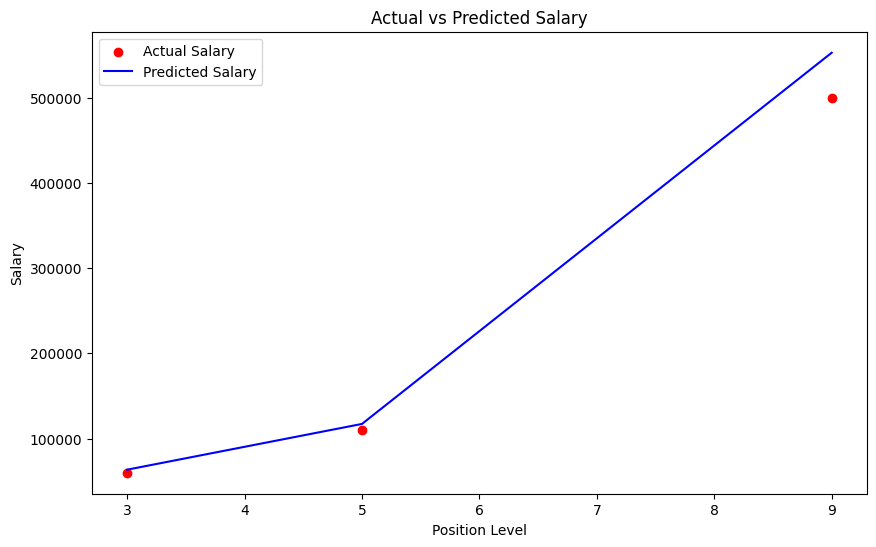

In [19]:
# Visualizing the Polynomial Regression results
plt.figure(figsize=(10,6))
plt.scatter(x_test, y_test, color='red', label='Actual Salary')
# order the x_test for better visualization
order = np.argsort(x_test[:,0])
x_test = x_test[order]
y_pred = y_pred[order]
plt.plot(x_test, y_pred, color='blue', label='Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.show()